# Periodic pattern detection
DFT and autocorrelation, inspired by https://github.com/qingkaikong/blog/blob/master/2017_01_detect_periodic_signal/detect_periodic_signal.ipynb

Michail Vlachos, Philip Yu, and Vittorio Castelli. “On periodicity detection and
structural periodic similarity”. In: Proceedings of the 2005 SIAM international
conference on data mining. SIAM. 2005, pp. 449–460.

In [416]:
import scipy.io as sio
import scipy.signal as sg
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import fft, arange, signal
from statsmodels import api as sm
plt.style.use('seaborn-poster')
%matplotlib inline

Generate dummy data

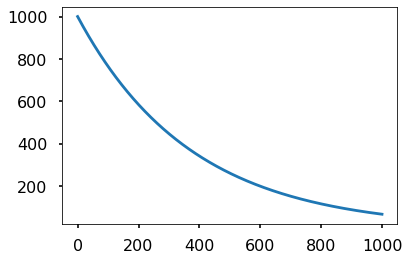

In [417]:
import matplotlib.pyplot as plt
import numpy as np 
import random

amplitude = 1000
t = 1000
random.seed()
tau = random.uniform(300, 400)
x = np.arange(t)
signal4 = amplitude*np.exp(-x/tau)
plt.plot(x, signal4)
plt.show()

In [472]:
freq = 2
amp = 1
starttime = 0
endtime = 2
# this is sampling rate, 500 samples/day
fs = 500
time = np.linspace(starttime, endtime, (endtime-starttime)*fs)
signal2 = np.zeros(1000)
signal2[range(0,1000,120)] = 1
signal2[range(1,1000,120)] = 1
signal3 = amp*sg.sawtooth(2*np.pi*freq*time, width=0.5)
signal1=np.exp(np.sin(20*np.pi*time)*np.sin(30*np.pi*time))
data = signal1


In [476]:
a_file = open("sinewave.txt", "w")
np.savetxt(a_file, signal1)
a_file.close()

## The whole function
In the following is the entire function so I can call it. For testing etc, the code is split into parts below.

In [480]:
def find_periods_DFT(data, fs):
    # numpy array
    temp = np.array(data)

    # remove the mean of the signal to create a signal oscillating around 0
    tempNorm = temp - np.mean(temp)
    
    # create timestamp that start with 0, this means our day start with day 0. 
    t = np.arange(len(temp))/float(fs)
    
    # get the frequency and spectrum
    f, Pxx = signal.periodogram(tempNorm, fs = fs, window='hanning', scaling='spectrum')
    
    # define thresholds
    s=[]
    for i in range(100):
        perm_i = np.random.permutation(tempNorm)
        f_i, Pxx_i = signal.periodogram(perm_i, fs = fs, window='hanning', scaling='spectrum')
        max_i = np.max(np.abs(Pxx_i))
        s.append(max_i)
    s.sort()
    threshold = s[-2]

    min_period_value = 0.1
    
    # filter out periods based on thresholds
    all_possible_periods = [1/f[x] for x in np.where(np.abs(Pxx)>threshold)][0]
    possible_periods = all_possible_periods[all_possible_periods>=min_period_value]
    
    # get the autocorrelation coefficient
    acf = sm.tsa.acf(tempNorm, nlags=len(tempNorm), fft=True)
    
    # extract the periods lying on hills and find the closest peak value
    acceleration=np.diff(np.diff(acf))
    periods=[]
    for hint in possible_periods:
        if (acceleration[math.floor(hint*fs)] <= 0):
            periods.append(find_closest_peak(acf, math.floor(hint*fs)))
    periods = np.unique(periods)
    
    # return the periods
    return periods

def find_closest_peak(func, index):
    # go right
    while (func[index] < func[index+1]):
        index += 1
    #go left
    while (func[index] < func[index-1]):
        index -= 1
    return index/fs

In [481]:
find_periods_DFT(data, fs)

array([0.2])

## Separate code parts for testing

Convert to numpy and normalize around 0.

In [505]:
# numpy array
temp = np.array(data)

# remove the mean of the signal to create a signal oscillating around 0
tempNorm = temp - np.mean(temp)

In [506]:
# create timestamp that start with 0, this means our day start with day 0. 
t = np.arange(len(temp))/float(fs)

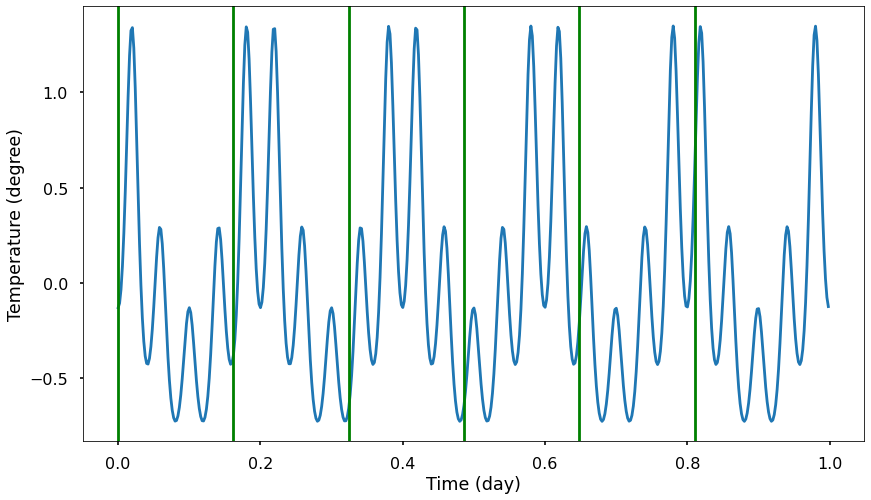

In [507]:
# let's plot the data
plt.figure(figsize = (14, 8))
plt.plot(t[:len(t)//2], tempNorm[:len(t)//2])
plt.xlabel('Time (day)')
plt.ylabel('Temperature (degree)')
#plt.axvline(x=0.2, color='red')
for i in range(6):
    plt.axvline(x=i*0.162, color='green')

## Frequency content

In [508]:
# get the frequency and spectrum
f, Pxx = signal.periodogram(tempNorm, fs = fs, window='hanning', scaling='spectrum')

In [509]:
pxx=[0,0.001901661807128024,2.884454584138655E-6,0.0019393819572058786,1.1926238217568837E-5,0.0020212740301899295,2.8459532316164543E-5,0.002163011658174896,5.541392774823942E-5,0.0023973928561317726,9.908381816838832E-5,0.0027957209032391543,1.7430475503211283E-4,0.0035339528614090738,3.228383622240859E-4,0.005154960433753009,7.040758430317838E-4,0.010180894946973797,0.002448023954738688,0.052304279550469956,0.19243674796038568,0.11480405208765156,0.004003332805391678,0.0074623038941680556,0.001004725612130861,0.0025843825128790457,5.859892684116171E-4,0.0015904517324688045,5.184117205396742E-4,0.0013550211567023233,5.860876436433309E-4,0.0014115209722170166,7.798624300613353E-4,0.0017141316396251717,0.0012059920799942147,0.0024769169515165054,0.002308574981020866,0.004817963496220041,0.006939733010448787,0.021010658294955856,0.16462679707223,0.15673336790992745,0.01821002943193921,0.005545512300271382,0.0036214661590245403,0.0016744989125856615,0.001784154123365425,8.881774078474902E-4,0.0013261192929673396,6.484872503223139E-4,0.001283690977255909,5.892407947953326E-4,0.001510795001009856,6.375016897710241E-4,0.002124656368851387,8.291651981503716E-4,0.0037428015998359336,0.0014309816195949285,0.010040369568789547,0.004915048089032228,0.12545556690990378,0.1847241173863112,0.04403094467335153,0.0018227425802156258,0.006819041748316767,4.342336662081657E-4,0.003010278442092628,1.8405334633938607E-4,0.0020305484526203683,1.042093783120514E-4,0.0017947132791774501,7.045908652716506E-5,0.001949239100066364,5.328318138613018E-5,0.002555398579573109,4.326675748232462E-5,0.004200238116609636,3.6884774183196664E-5,0.01019312066216721,3.274373358494985E-5,0.08333040523771346,0.1944279665312228,0.07939342050885137,2.9850389456305937E-5,0.00896494646122831,3.166048191955718E-5,0.0035677562987800637,3.691640779742202E-5,0.002222424153039402,4.784964416129098E-5,0.0018255848036130451,6.923561056960324E-5,0.0018528855699124199,1.1264692497114104E-4,0.00227964288647875,2.1203450439739028E-4,0.0035062329520242105,5.032100015254562E-4,0.007740230517074897,0.0019992167871727517,0.04618909666564864,0.18420767942766028,0.11874616431642011,0.004429291988689547,0.008677808881600736,0.00119923815029142,0.0030834952727689597,6.819734045553885E-4,0.0017725724591904754,5.476773630527032E-4,0.0013538559489900358,5.560276668669888E-4,0.0012819268307520347,6.851029922582785E-4,0.0014731265991926735,0.0010253386072432266,0.002105497120099276,0.001980944424206522,0.004208262822752691,0.006212595709228279,0.019376014202961794,0.1568496952733958,0.15432820083671103,0.018482434433320653,0.005768794026583775,0.003828716435521937,0.0017807033160141899,0.001887866968727817,9.260442948860534E-4,0.0013524306098694333,6.441943935944452E-4,0.0012409531107108003,5.553769112113547E-4,0.0013939214280464264,5.788655886203465E-4,0.0019101736534090355,7.426863808877434E-4,0.0033599204362535977,0.0012944466267459434,0.009194335313401964,0.0045726881539943556,0.11885210796990756,0.17834515273087642,0.04328438956690119,0.0018196348336978747,0.006883436106595614,4.4077531841003474E-4,0.0030537121457935258,1.8547361870311483E-4,0.002022436442994868,1.022292008610844E-4,0.001731244768880532,6.684654427428461E-5,0.0018219998388836773,4.921360183104796E-5,0.0023407738513674505,3.946474786498982E-5,0.003830392114521492,3.3758759195927544E-5,0.009394451536081887,3.0471071026877627E-5,0.07844548002264055,0.18531424000433222,0.07659821850194505,2.9111197571281783E-5,0.008815389779727303,3.1282723067155815E-5,0.0035280872310977586,3.638679436284674E-5,0.002175381679565128,4.6381985791455656E-5,0.0017494971358539774,6.556959363632282E-5,0.0017354459465737685,1.0452364898343962E-4,0.0021005583431431512,1.9456333185479703E-4,0.003213337641801005,4.619168557826529E-4,0.007134867041084943,0.0018545477852504762,0.043185846199338705,0.17374315556735986,0.11299204818987815,0.004248704635699605,0.008377922307529132,0.0011626242750522547,0.0029934774215965823,6.610126090545863E-4,0.0017105638480722537,5.249942876855273E-4,0.0012871441568094665,5.239538871866451E-4,0.0011975838727514738,6.351685285951702E-4,0.0013575972511186262,9.411875161917066E-4,0.001929322286004286,0.001816052699501501,0.003867766094017792,0.0057345121479964855,0.01798608416390722,0.14654197480571252,0.14515391029472863,0.017493205550166247,0.005488688506627005,0.003656041125356461,0.0017031008769480748,0.001804405572403141,8.825680210592119E-4,0.0012827847195379064,6.072538622324545E-4,0.0011617141193785427,5.16298218705416E-4,0.0012875973248435424,5.319125121364355E-4,0.0017486900772148875,6.785364999890655E-4,0.003069017867053803,0.001184118434061105,0.008435666815183283,0.004212797705541067,0.1100384992103176,0.16598733524679832,0.040489172014259764,0.0017095541276608383,0.006487674091777047,4.16120226867489E-4,0.0028825942887869254,1.747483773089311E-4,0.001898792106823698,9.55211317252518E-5,0.0016086740916118464,6.175570588846536E-5,0.0016740725336583592,4.5007271357490004E-5,0.00213318099685215,3.5887665941525906E-5,0.0034808333962569583,3.070100524080932E-5,0.008560981156768151,2.785370759681665E-5,0.0719825993393209,0.17076233357248516,0.0708772499646739,2.7036579677495312E-5,0.008210384123855618,2.9183721919725265E-5,0.0032921389416384794,3.3911076404057175E-5,0.00202202792318717,4.294939044392263E-5,0.0016126514213166945,6.0145954905329696E-5,0.0015843389851440436,9.502161133759641E-5,0.0019032526404736696,1.7589709685763926E-4,0.002902162053739302,4.17282465572663E-4,0.006454244352048224,0.0016815301958730171,0.03927537640498849,0.15855196652872908,0.10347164116637338,0.0039031008376983344,0.007715984269848605,0.0010724826895904056,0.002762642381782581,6.095580316864118E-4,0.001574254358732776,4.8168990622503044E-4,0.001176489472928303,4.7690238600319406E-4,0.0010854640835158856,5.734961891163748E-4,0.001221910063540119,8.45209736654639E-4,0.001730465042148991,0.0016286202962163094,0.0034715492914810814,0.005155968955560002,0.016210341540915954,0.13244641690559483,0.1315785103728343,0.015901072785821826,0.005000566323839617,0.003336049331129486,0.001554967308075539,0.0016466973672452164,8.041998494779501E-4,0.0011659818809673051,5.501878743050496E-4,0.0010487007425688194,4.643216286462371E-4,0.0011538863735359613,4.7524036729433236E-4,0.0015588301229077135,6.040263071957721E-4,0.0027307755349736964,0.0010540964457937002,0.007518883806418077,0.0037621144774076755,0.09849621031010201,0.14895035295231515,0.036421655472569925,0.00154100784974206,0.00585671128134842,3.759095582079786E-4,0.0026034631861982294,1.5764289240822365E-4,0.0017094324211656311,8.57588488490552E-5,0.0014396249540265754,5.507851954976059E-5,0.0014881776236603,3.9894071883864944E-5,0.0018865300527076423,3.168993593758575E-5,0.0030715683225189705,2.7094973599450648E-5,0.007562143012756327,2.4640953458892027E-5,0.06380349622319763,0.15168659703496262,0.06309480523821491,2.4113473855163544E-5,0.00733306440081789,2.6084857567352708E-5,0.0029424418983427414,3.0282178615455403E-5,0.0018025944779836041,3.819763328275277E-5,0.0014301375486742173,5.317394064928873E-5,0.001396397996133656,8.351729361034995E-5,0.0016690165915845762,1.5399884991832203E-4,0.002538612787812002,3.649628701053726E-4,0.005648241336194899,0.001473263399000542,0.03446636646638779,0.1393977353092094,0.09114494931771114,0.003444072484103633,0.006817721810706761,9.483755384298893E-4,0.002443186624352361,5.387161484871852E-4,0.0013893393180583896,4.2423257698262056E-4,0.001033504282826458,4.1775280880862426E-4,9.480987077573424E-4,4.995775198884068E-4,0.0010619950678165677,7.333380869297482E-4,0.0014998463413933032,0.001411072646192363,0.003008752153512478,0.004472572547160068,0.01408044732249434,0.11522918880912475,0.11466844253075968,0.01387952021153981,0.004370436779337255,0.002918030678982298,0.001360401105037051,0.0014399610876882928,7.024099603715262E-4,0.001016561464314854,4.7857518631147815E-4,9.098095895977272E-4,4.017300692260972E-4,9.957457350250644E-4,4.091761184124034E-4,0.0013397355550368326,5.185107208064321E-4,0.002342868379569109,9.044298267309277E-4,0.006455411981976702,0.003233502353141528,0.0847738030075049,0.12839276487059278,0.031440678930253915,0.0013318884402638374,0.00506609625116826,3.2525773722544445E-4,0.0022519094304795425,1.3622220615922866E-4,0.0014748072409819558,7.383342587257925E-5,0.001236414608914421,4.718158110991176E-5,0.0012715860325511947,3.4010328495978806E-5,0.0016053123715614663,2.6930391371800305E-5,0.0026083446982715797,2.3005738467127855E-5,0.0064235080735147495,2.0948871701933197E-5,0.0543077902168488,0.12928562907406885,0.05384917151953504,2.0603930723999548E-5,0.006270957920289916,2.2314656631914258E-5,0.002516620664082509,2.5878680114553283E-5,0.0015383091931907718,3.253518462549431E-5,0.0012153613746859343,4.507680396291839E-5,0.0011808386163335556,7.046411917354394E-5,0.0014054569044146816,1.2949355629177613E-4,0.0021327532705183393,3.065161843281074E-4,0.004744719272701286,0.0012384182960329222,0.02900137306770317,0.11743541223140704,0.07687966013063681,0.002908245095056908,0.0057617581970226895,8.018115522018886E-4,0.0020653849738858183,4.551034608205044E-4,0.00117224588688007,3.5731853191945707E-4,8.68631907811704E-4,3.5027897050834083E-4,7.930445459298004E-4,4.1692174621285784E-4,8.845292563619047E-4,6.0984423332912E-4,0.001245975002063446,0.0011716449731659457,0.0024982995730647374,0.0037155708509181277,0.011707070574225356,0.09590788707001968,0.09554927019222252,0.011577465804766162,0.0036485303019853366,0.0024371232661569544,0.0011361730509763866,0.001201949644251032,5.856619960969197E-4,8.462377170107526E-4,3.975891775832373E-4,7.541276809803629E-4,3.321977035747064E-4,8.215121853691892E-4,3.3688892305312236E-4,0.0011012179379982967,4.2569349794349285E-4,0.0019221996481980162,7.419251525191486E-4,0.005297172349185574,0.002655148036544126,0.06967556537484819,0.10563538509037182,0.025893610396300337,0.0010977871048175498,0.004177658701870403,2.682310406120386E-4,0.0018562470531340743,1.1217778138971027E-4,0.0012126920678268013,6.059562091596813E-5,0.0010125025550403919,3.854672727174528E-5,0.0010364723851613218,2.7663426924915358E-5,0.0013034240615582813,2.183697858528678E-5,0.00211327263865787,1.8633186011614663E-5,0.005203383751786083,1.6978691617485188E-5,0.04405088008661531,0.10496696489178402,0.04376125143285242,1.6757322484781455E-5,0.005102811247807545,1.815997823603595E-5,0.0020473224860653575,2.1034481067878586E-5,0.0012486409306423935,2.6361006493794896E-5,9.826237201802327E-4,3.636049302759379E-5,9.50288997154402E-4,5.6583190446394945E-5,0.0011264731718574777,1.0363680484365606E-4,0.0017052073254150905,2.449499052094349E-4,0.00379163169233233,9.900315864244935E-4,0.023200429840234425,0.09402583049073962,0.06160902612566006,0.0023323883262506714,0.004623335457384595,6.434965615867412E-4,0.0016571190601066255,3.6485982514540923E-4,9.386023838090635E-4,2.8560798842153825E-4,6.928655676444354E-4,2.787601727977969E-4,6.296394080105342E-4,3.3027253865529176E-4,6.993034452185298E-4,4.8136318937044045E-4,9.823437599416687E-4,9.231327042648722E-4,0.0019680382702735684,0.0029276352728139863,0.009229595247088579,0.07566938222532042,0.07544911180560998,0.00914890794614316,0.0028847732342480886,0.0019273734584466867,8.983453175977939E-4,9.496992566504186E-4,4.622025070566315E-4,6.66749097953606E-4,3.1262564148252673E-4,5.916213883224645E-4,2.599918757864227E-4,6.414573964686572E-4,2.624977865450209E-4,8.565420550590542E-4,3.306742209077905E-4,0.001491903880277631,5.756404062468284E-4,0.0041102957557203725,0.0020611387956172064,0.054124096598299705,0.08212130142379846,0.020144610817513217,8.54531484014384E-4,0.003252791544864113,2.0881964261903452E-4,0.001444219959994526,8.718153161603679E-5,9.409839778272542E-4,4.692573155780597E-5,7.82306978121775E-4,2.971093528535105E-5,7.96968948670522E-4,2.122371456240967E-5,9.980921913726362E-4,1.669667735999227E-5,0.0016141885267740898,1.4225252588658968E-5,0.0039721875742029684,1.2965296642184895E-5,0.03365761484643502,0.08025863559647163,0.03348407588597004,1.282924167390113E-5,0.003907831429140526,1.3906144194059293E-5,0.0015669105452316705,1.6082044557928642E-5,9.532064981319392E-4,2.0084655509995916E-5,7.469645415179658E-4,2.7572142761891453E-5,7.18806537435347E-4,4.269906311805075E-5,8.48301345609493E-4,7.791413384454225E-5,0.0012804379342348459,1.8380362524316585E-4,0.0028444854813890422,7.428531180900098E-4,0.017416346825850013,0.07063028847634897,0.04631115987136942,0.0017542541586801725,0.003478499043569056,4.8414087039437234E-4,0.0012461622475845467,2.741113897854926E-4,7.041182018610883E-4,2.138449039484266E-4,5.17587242035357E-4,2.0771596650707186E-4,4.6795396912527884E-4,2.4484788581644924E-4,5.17263071692738E-4,3.5539081596328584E-4,7.24249111193286E-4,6.799857684324694E-4,0.0014490881900343841,0.002155720459382979,0.006798587203920696,0.05577106424614457,0.05564505685372371,0.006751387832878607,0.00212957835964203,0.0014228498128998719,6.629161916663536E-4,7.001769570884061E-4,3.402804811219027E-4,4.89937094531067E-4,2.2919258983998675E-4,4.3261018350750123E-4,1.8959908006184234E-4,4.665402134281952E-4,1.9045202387333096E-4,6.201594450016515E-4,2.3902900396609208E-4,0.0010772356351994796,4.1539848415480174E-4,0.0029657407933215557,0.00148756831921859,0.03908227001995302,0.05933521810925335,0.01456351607247937,6.180241901191044E-4,0.0023526951284496955,1.509829782569448E-4,0.0010433272189516011,6.289444223257738E-5,6.775610935224962E-4,3.3710367871663674E-5,5.604978967791395E-4,2.122668542577067E-5,5.677759705249084E-4,1.5080094073335518E-5,7.075317878504565E-4,1.1813965480015906E-5,0.0011406133101024049,1.0043786251132825E-5,0.002803745757348146,9.152591871699529E-6,0.023769871899798695,0.056713156388634785,0.02367436567432678,9.074476981099713E-6,0.002764445540893044,9.834445933558737E-6,0.0011072362286809537,1.1348880568228667E-5,6.713967219171141E-4,1.4113234572759918E-5,5.234416477292143E-4,1.9263987746727904E-5,5.006953338741321E-4,2.9656842384354263E-5,5.876729465854928E-4,5.386103499685722E-5,8.837357203959761E-4,1.2672714800865016E-4,0.0019602257204334138,5.119100345665791E-4,0.012005671200100336,0.04871313341355528,0.031958305181825596,0.0012111008533664273,0.002401872108664082,3.3421301714377217E-4,8.596069879141126E-4,1.8883427980564486E-4,4.841481481481479E-4,1.4668319312785883E-4,3.5401871457794537E-4,1.4162814399415157E-4,3.180343139805693E-4,1.6588129559792327E-4,3.494326111760248E-4,2.394960363313696E-4,4.8714380880189297E-4,4.567777788679229E-4,9.72724328684965E-4,0.0014467763243043554,0.004563686567125955,0.037454502686979,0.037390112674363034,0.004538585637464419,0.0014318879938254793,9.565110501249622E-4,4.4533086390081077E-4,4.6975431398322496E-4,2.2786290493640577E-4,3.27264397163579E-4,1.5263964671315792E-4,2.871571579056111E-4,1.254129373991561E-4,3.075351189704526E-4,1.2513997282603934E-4,4.0635166087008023E-4,1.5627111762558013E-4,7.031384191487744E-4,2.708769092371957E-4,0.0019331565116186917,9.69703219893513E-4,0.02548622400217702,0.03871343075918146,0.00950645056870216,4.0351767693412745E-4,0.0015358881940778133,9.849939946059755E-5,6.797871531513486E-4,4.0900512492336246E-5,4.3949426240807543E-4,2.1797872543901492E-5,3.6114940947178076E-4,1.3625546219385963E-5,3.6307618796713404E-4,9.608619392136517E-6,4.4938115042046336E-4,7.48379351699133E-6,7.211229182444099E-4,6.341789598769487E-6,0.0017691947301549755,5.774793363986699E-6,0.015001693896652003,0.03580997632111704,0.014955640995853215,5.734155460405536E-6,0.0017466818849741596,6.209903275910119E-6,6.98276821933677E-4,7.143154187726457E-6,4.2146637074929667E-4,8.830431027969281E-6,3.2626918366855114E-4,1.1958255553162192E-5,3.0950577910719907E-4,1.8258245636070292E-5,3.604744908222129E-4,3.293570028167929E-5,5.391032415640689E-4,7.717956241908112E-5,0.0011927104235732366,3.113782891933586E-4,0.007303787062291641,0.02964770887602338,0.019459676993220668,7.376813167874212E-4,0.0014629088607882735,2.0344018340706844E-4,5.225991367890553E-4,1.145721801229472E-4,2.9293552976823945E-4,8.844166291962954E-5,2.1258134676232894E-4,8.466254425121209E-5,1.892265484911371E-4,9.824499975531723E-5,2.0607907572239574E-4,1.4072693262164246E-4,2.854081392691874E-4,2.6705531540117353E-4,5.679710984699529E-4,8.442893273297771E-4,0.0026631949831170836,0.021864625450777046,0.02183723738432047,0.0026516266108236467,8.365674452577517E-4,5.585270740730655E-4,2.597122942566866E-4,2.7339036683212363E-4,1.322263867848684E-4,1.8919892348965884E-4,8.785243179375857E-5,1.6445394567232797E-4,7.144714862805418E-5,1.7428517776739278E-4,7.056989467674661E-5,2.2815743649576693E-4,8.74302568822913E-5,3.9234400354948003E-4,1.50883573003688E-4,0.0010758382647095125,5.395413283318905E-4,0.014183934462093605,0.02155489016584707,0.005295003169082543,2.247667142838225E-4,8.550813446879757E-4,5.476886187191735E-5,3.77172946107928E-4,2.2622972804010572E-5,2.4211309244771497E-4,1.1949679295755056E-5,1.9688773374315906E-4,7.384155860470389E-6,1.9557920458887097E-4,5.1460466341934885E-6,2.3942217545781084E-4,3.969814782968172E-6,3.8123369296162615E-4,3.3449168239654334E-6,9.319059822062192E-4,3.040303082301144E-6,0.007898815096834525,0.018862519074079258,0.007880879478403158,3.0219186636721887E-6,9.200714647787455E-4,3.266915008453703E-6,3.665237636120489E-4,3.736965850451317E-6,2.1951963874560155E-4,4.5744115186277025E-6,1.6796215301573289E-4,6.114239871014777E-6,1.5714122540475505E-4,9.206669735344712E-6,1.806265886568884E-4,1.6414276216494975E-5,2.6752133284865554E-4,3.8181130843536776E-5,5.889181362884461E-4,1.536122460887973E-4,0.003602759334342431,0.014629174625195637,0.009606045357840227,3.642034907991051E-4,7.219436607462854E-4,1.002665773253619E-4,2.5695064874799476E-4,5.612924710616887E-5,1.4280975724646557E-4,4.285389256602834E-5,1.0227086834313619E-4,4.040919240368862E-5,8.957081000670815E-5,4.6122916811292056E-5,9.600365834422716E-5,6.511556294568017E-5,1.3133189132924752E-4,1.2238202986063218E-4,2.595817335699759E-4,3.8532206250629274E-4,0.0012149315704945945,0.009976513061697879,0.00996814401744448,0.0012106496093562526,3.8179884348006805E-4,2.5456181295081554E-4,1.180658089751747E-4,1.237887251510853E-4,5.954240768346032E-5,8.460439743950082E-5,3.895989514150094E-5,7.225176051359211E-5,3.107855385507845E-5,7.505202320843638E-5,3.0098389920899045E-5,9.647311185701558E-5,3.670235753080605E-5,1.6379038256755611E-4,6.274957341774739E-5,4.464409381531497E-4,2.2369618471160523E-4,0.005880718584552088,0.008940197262507497,0.0021967478113835994,9.321617791330938E-5,3.5412421315138287E-4,2.2618226128225946E-5,1.5506551645070587E-4,9.242346141827256E-6,9.810902991884498E-5,4.79471946591277E-6,7.811396752925764E-5,2.894009312166453E-6,7.569300055926135E-5,1.9673495792892196E-6,9.050769775038439E-5,1.4862822027073967E-6,1.4164713348600592E-4,1.236050146392409E-6,3.4321422330064474E-4,1.1179379266870007E-6,0.0029034605919270274,0.006935655714740599,0.002898658606079014,1.111142147693338E-6,3.3779919526690525E-4,1.1956530243083356E-6,1.3345097087704005E-4,1.3505509644826765E-6,7.856355749391346E-5,1.6175684565666112E-6,5.856911765907139E-5,2.099410005347404E-6,5.309009268967685E-5,3.0607869886844384E-6,5.914943636971486E-5,5.3042520556091425E-6,8.551999002682238E-5,1.2108352045503582E-5,1.857943327807663E-4,4.832894273851186E-5,0.0011324446471590508,0.004598968408061692,0.0030209031280790974,1.1450429964267009E-4,2.2660707736050245E-4,3.135781634982609E-5,7.98661576028982E-5,1.7289095974943318E-5,4.3458632786110765E-5,1.2844492860246626E-5,3.010747418184239E-5,1.1657846586942922E-5,2.5286955343819907E-5,1.2737346944157087E-5,2.5956950616327494E-5,1.7272532667166333E-5,3.4284161972227466E-5,3.155886189317501E-5,6.638266878453164E-5,9.806806327383415E-5,3.085975324206693E-4,0.0025334815231527665,0.0025322578801218586,3.074829675749543E-4,9.67919687791186E-5,6.425309783863285E-5,2.9572522703782825E-5,3.0649883822688644E-5,1.4511743767518532E-5,2.0208803181871892E-5,9.082483248559216E-6,1.6379141446971503E-5,6.832615733882899E-6,1.5980595737993705E-5,6.20928680112914E-6,1.9326229095425242E-5,7.168131165922082E-6,3.1351376526609254E-5,1.184038000578467E-5,8.350753767571046E-5,4.166946640175087E-5,0.0010942751530859836,0.001664029569060516,4.088168991845444E-4,1.730962162295017E-5,6.538845931606663E-5,4.133760268257034E-6,2.7895078432030042E-5,1.6263017601734396E-6,1.6773762575322028E-5,7.911312293790868E-7,1.235957871785052E-5,4.367320537663E-7,1.0854247279356369E-5,2.677371000763543E-7,1.1710532977583303E-5,1.8376018548153E-7,1.6867225250804377E-5,1.431357547455674E-7,3.903470250591873E-5,1.25955005434209E-7,3.260641150744791E-4,7.78794931903424E-4,3.2545558641886664E-4,1.243943115024009E-7,3.7509770675034894E-5,1.3073134009065796E-7,1.423896154199922E-5,1.3916047102433933E-7,7.727071719989101E-6,1.499623867167275E-7,5.051694369262329E-6,1.6631704233784347E-7,3.8189356359125355E-6,1.9823392817862075E-7,3.4374108892626754E-6,2.7759863708658644E-7,4.0781937791012575E-6,5.361929552987578E-7,7.8173428044474E-6,1.9754435208779345E-6,4.574701178216998E-5,1.8540347625881778E-4,1.217712848192227E-4,4.5925740276456684E-6,8.950349109559338E-6,1.2019515307216065E-6,2.9172311715127797E-6,5.889719469712031E-7,1.346583008122178E-6,3.5160681959167884E-7,7.036893107217323E-7,2.2344301915038428E-7,3.7874128146982885E-7,1.4064278445876907E-7,1.9674920325398154E-7,8.223114804598886E-8,9.147652195749756E-8,4.050397897292137E-8,3.287770814038011E-8,1.3116031901295833E-8,5.469701399309716E-9,5.600730604932991E-10,5.600730604935005E-10,5.4697013993124014E-9,1.3116031901292385E-8,3.287770814037702E-8,4.0503978972930475E-8,9.147652195749115E-8,8.223114804599116E-8,1.9674920325400078E-7,1.406427844587724E-7,3.7874128146983674E-7,2.234430191503936E-7,7.036893107217693E-7,3.5160681959169117E-7,1.3465830081222158E-6,5.889719469712086E-7,2.9172311715128245E-6,1.2019515307216353E-6,8.950349109559211E-6,4.592574027645669E-6,1.2177128481922219E-4,1.8540347625881814E-4,4.5747011782169927E-5,1.975443520877921E-6,7.817342804447465E-6,5.361929552987629E-7,4.078193779101189E-6,2.775986370866078E-7,3.437410889262694E-6,1.9823392817864267E-7,3.818935635912628E-6,1.663170423378314E-7,5.051694369262367E-6,1.4996238671671955E-7,7.727071719989059E-6,1.391604710243408E-7,1.4238961541999295E-5,1.3073134009066492E-7,3.750977067503492E-5,1.2439431150239788E-7,3.254555864188667E-4,7.787949319034238E-4,3.260641150744793E-4,1.2595500543420628E-7,3.9034702505918894E-5,1.4313575474557714E-7,1.686722525080455E-5,1.8376018548150565E-7,1.171053297758381E-5,2.677371000763243E-7,1.0854247279356423E-5,4.367320537663127E-7,1.2359578717850466E-5,7.911312293791319E-7,1.6773762575321886E-5,1.6263017601734633E-6,2.789507843202978E-5,4.13376026825708E-6,6.538845931606651E-5,1.7309621622950156E-5,4.088168991845444E-4,0.001664029569060517,0.0010942751530859842,4.1669466401750897E-5,8.350753767571013E-5,1.1840380005784674E-5,3.13513765266092E-5,7.168131165922236E-6,1.9326229095425594E-5,6.2092868011291106E-6,1.5980595737993637E-5,6.832615733882912E-6,1.6379141446971408E-5,9.082483248559196E-6,2.0208803181872103E-5,1.4511743767518525E-5,3.0649883822688556E-5,2.9572522703782893E-5,6.425309783863275E-5,9.679196877911863E-5,3.0748296757495444E-4,0.0025322578801218573,0.0025334815231527674,3.085975324206685E-4,9.806806327383437E-5,6.638266878453195E-5,3.155886189317508E-5,3.428416197222752E-5,1.7272532667166496E-5,2.595695061632725E-5,1.273734694415692E-5,2.5286955343819862E-5,1.1657846586942902E-5,3.0107474181842495E-5,1.2844492860246783E-5,4.345863278611065E-5,1.728909597494315E-5,7.986615760289862E-5,3.1357816349826E-5,2.2660707736050245E-4,1.1450429964267004E-4,0.0030209031280790987,0.004598968408061692,0.0011324446471590503,4.8328942738511966E-5,1.857943327807665E-4,1.2108352045503556E-5,8.551999002682267E-5,5.3042520556092975E-6,5.9149436369714315E-5,3.060786988684457E-6,5.309009268967655E-5,2.099410005347468E-6,5.8569117659071364E-5,1.617568456566597E-6,7.856355749391247E-5,1.3505509644826322E-6,1.3345097087704016E-4,1.1956530243083186E-6,3.3779919526690476E-4,1.1111421476933229E-6,0.002898658606079015,0.006935655714740601,0.0029034605919270283,1.1179379266870177E-6,3.43214223300645E-4,1.2360501463924053E-6,1.4164713348600606E-4,1.4862822027073537E-6,9.050769775038454E-5,1.9673495792892606E-6,7.569300055926121E-5,2.8940093121664696E-6,7.811396752925747E-5,4.79471946591271E-6,9.810902991884536E-5,9.242346141827295E-6,1.55065516450706E-4,2.261822612822591E-5,3.541242131513827E-4,9.321617791330926E-5,0.0021967478113835964,0.008940197262507497,0.005880718584552085,2.2369618471160493E-4,4.4644093815314993E-4,6.274957341774736E-5,1.6379038256755611E-4,3.670235753080558E-5,9.6473111857016E-5,3.0098389920899173E-5,7.505202320843619E-5,3.107855385507861E-5,7.225176051359196E-5,3.8959895141500986E-5,8.460439743950098E-5,5.954240768346079E-5,1.237887251510855E-4,1.1806580897517479E-4,2.545618129508152E-4,3.8179884348006914E-4,0.0012106496093562526,0.009968144017444483,0.00997651306169788,0.0012149315704945943,3.853220625062925E-4,2.595817335699764E-4,1.2238202986063201E-4,1.313318913292481E-4,6.51155629456803E-5,9.600365834422746E-5,4.6122916811291825E-5,8.957081000670796E-5,4.040919240368864E-5,1.0227086834313583E-4,4.285389256602831E-5,1.4280975724646552E-4,5.612924710616923E-5,2.5695064874799525E-4,1.002665773253618E-4,7.219436607462855E-4,3.642034907991048E-4,0.009606045357840234,0.01462917462519564,0.0036027593343424345,1.5361224608879788E-4,5.889181362884469E-4,3.8181130843537E-5,2.675213328486555E-4,1.641427621649511E-5,1.8062658865688862E-4,9.206669735344751E-6,1.5714122540475486E-4,6.114239871014685E-6,1.6796215301573283E-4,4.574411518627612E-6,2.1951963874560347E-4,3.7369658504514274E-6,3.6652376361204886E-4,3.2669150084537185E-6,9.200714647787456E-4,3.021918663672187E-6,0.007880879478403163,0.01886251907407926,0.007898815096834523,3.0403030823011904E-6,9.31905982206219E-4,3.3449168239654177E-6,3.8123369296162615E-4,3.969814782968143E-6,2.3942217545781035E-4,5.146046634193513E-6,1.9557920458887116E-4,7.384155860470304E-6,1.9688773374315846E-4,1.1949679295755153E-5,2.421130924477149E-4,2.2622972804009816E-5,3.7717294610792735E-4,5.476886187191705E-5,8.550813446879773E-4,2.247667142838235E-4,0.005295003169082546,0.02155489016584707,0.014183934462093605,5.395413283318906E-4,0.001075838264709512,1.508835730036871E-4,3.923440035494808E-4,8.74302568822913E-5,2.281574364957681E-4,7.056989467674646E-5,1.742851777673929E-4,7.144714862805432E-5,1.6445394567232789E-4,8.785243179375838E-5,1.891989234896593E-4,1.3222638678486856E-4,2.7339036683212293E-4,2.5971229425668634E-4,5.585270740730671E-4,8.365674452577528E-4,0.0026516266108236497,0.021837237384320456,0.02186462545077704,0.0026631949831170836,8.442893273297754E-4,5.679710984699528E-4,2.6705531540117364E-4,2.8540813926918664E-4,1.4072693262164168E-4,2.0607907572239576E-4,9.82449997553175E-5,1.8922654849113743E-4,8.466254425121174E-5,2.125813467623283E-4,8.84416629196289E-5,2.929355297682399E-4,1.1457218012294703E-4,5.225991367890558E-4,2.0344018340706863E-4,0.0014629088607882757,7.37681316787421E-4,0.019459676993220668,0.02964770887602338,0.007303787062291641,3.1137828919335867E-4,0.0011927104235732366,7.717956241908079E-5,5.391032415640681E-4,3.293570028167906E-5,3.6047449082221334E-4,1.8258245636070105E-5,3.0950577910719934E-4,1.1958255553162287E-5,3.2626918366855076E-4,8.830431027969566E-6,4.214663707492966E-4,7.143154187726417E-6,6.98276821933676E-4,6.209903275910074E-6,0.0017466818849741592,5.734155460405605E-6,0.014955640995853212,0.03580997632111704,0.015001693896652003,5.77479336398673E-6,0.0017691947301549781,6.341789598769475E-6,7.211229182444108E-4,7.483793516991255E-6,4.4938115042046384E-4,9.60861939213666E-6,3.630761879671341E-4,1.3625546219386024E-5,3.6114940947178103E-4,2.1797872543901184E-5,4.3949426240807673E-4,4.0900512492336036E-5,6.797871531513492E-4,9.849939946059739E-5,0.001535888194077814,4.03517676934127E-4,0.009506450568702163,0.03871343075918145,0.025486224002177014,9.697032198935136E-4,0.0019331565116186922,2.7087690923719565E-4,7.031384191487736E-4,1.562711176255805E-4,4.063516608700789E-4,1.2513997282603947E-4,3.0753511897045345E-4,1.2541293739915655E-4,2.871571579056113E-4,1.5263964671315754E-4,3.272643971635786E-4,2.2786290493640484E-4,4.697543139832254E-4,4.453308639008112E-4,9.565110501249599E-4,0.0014318879938254793,0.0045385856374644176,0.03739011267436303,0.037454502686979,0.00456368656712595,0.0014467763243043545,9.727243286849663E-4,4.567777788679233E-4,4.8714380880189275E-4,2.3949603633136962E-4,3.494326111760252E-4,1.6588129559792336E-4,3.180343139805693E-4,1.416281439941516E-4,3.540187145779457E-4,1.4668319312785859E-4,4.841481481481479E-4,1.8883427980564486E-4,8.596069879141107E-4,3.3421301714377287E-4,0.0024018721086640814,0.0012111008533664288,0.03195830518182559,0.048713133413555286,0.012005671200100333,5.119100345665783E-4,0.001960225720433415,1.2672714800865008E-4,8.837357203959775E-4,5.386103499685717E-5,5.876729465854927E-4,2.965684238435416E-5,5.006953338741324E-4,1.926398774672787E-5,5.234416477292136E-4,1.411323457276002E-5,6.713967219171138E-4,1.134888056822888E-5,0.001107236228680954,9.83444593355875E-6,0.0027644455408930447,9.07447698109978E-6,0.02367436567432678,0.05671315638863481,0.023769871899798692,9.152591871699454E-6,0.002803745757348146,1.0043786251132899E-5,0.001140613310102405,1.1813965480016073E-5,7.075317878504561E-4,1.5080094073335477E-5,5.677759705249086E-4,2.122668542577079E-5,5.604978967791393E-4,3.371036787166369E-5,6.775610935224958E-4,6.289444223257723E-5,0.0010433272189516011,1.509829782569445E-4,0.0023526951284496955,6.180241901191049E-4,0.01456351607247937,0.05933521810925339,0.03908227001995302,0.0014875683192185909,0.002965740793321554,4.153984841548023E-4,0.00107723563519948,2.3902900396609232E-4,6.201594450016504E-4,1.9045202387333075E-4,4.66540213428195E-4,1.89599080061843E-4,4.326101835075015E-4,2.2919258983998648E-4,4.899370945310669E-4,3.4028048112190186E-4,7.00176957088409E-4,6.629161916663513E-4,0.0014228498128998736,0.002129578359642031,0.006751387832878603,0.055645056853723694,0.05577106424614461,0.006798587203920698,0.0021557204593829794,0.0014490881900343841,6.7998576843247E-4,7.242491111932856E-4,3.5539081596328595E-4,5.172630716927386E-4,2.4484788581644875E-4,4.6795396912527776E-4,2.0771596650707178E-4,5.17587242035356E-4,2.1384490394842618E-4,7.041182018610863E-4,2.741113897854915E-4,0.0012461622475845463,4.841408703943718E-4,0.003478499043569056,0.0017542541586801714,0.04631115987136941,0.07063028847634897,0.017416346825850013,7.428531180900098E-4,0.0028444854813890414,1.8380362524316585E-4,0.0012804379342348465,7.791413384454183E-5,8.483013456094923E-4,4.269906311805075E-5,7.188065374353471E-4,2.7572142761891643E-5,7.469645415179644E-4,2.008465550999591E-5,9.532064981319379E-4,1.608204455792871E-5,0.0015669105452316707,1.3906144194059095E-5,0.003907831429140524,1.2829241673901073E-5,0.03348407588597002,0.08025863559647163,0.03365761484643502,1.2965296642184985E-5,0.003972187574202963,1.4225252588658867E-5,0.001614188526774093,1.6696677359992146E-5,9.98092191372637E-4,2.1223714562409585E-5,7.969689486705225E-4,2.9710935285350793E-5,7.823069781217747E-4,4.6925731557805824E-5,9.409839778272551E-4,8.718153161603757E-5,0.001444219959994525,2.0881964261903487E-4,0.003252791544864117,8.545314840143822E-4,0.020144610817513214,0.08212130142379849,0.05412409659829968,0.002061138795617209,0.00411029575572037,5.756404062468274E-4,0.0014919038802776322,3.306742209077914E-4,8.565420550590531E-4,2.6249778654502073E-4,6.414573964686554E-4,2.5999187578642206E-4,5.91621388322465E-4,3.126256414825269E-4,6.667490979536039E-4,4.622025070566322E-4,9.496992566504196E-4,8.983453175977937E-4,0.0019273734584466851,0.002884773234248095,0.009148907946143165,0.07544911180560997,0.07566938222532042,0.009229595247088575,0.0029276352728139863,0.001968038270273567,9.231327042648717E-4,9.823437599416694E-4,4.8136318937044197E-4,6.993034452185291E-4,3.3027253865529224E-4,6.296394080105348E-4,2.78760172797796E-4,6.928655676444346E-4,2.856079884215386E-4,9.386023838090635E-4,3.648598251454091E-4,0.0016571190601066246,6.434965615867402E-4,0.004623335457384595,0.0023323883262506714,0.06160902612566006,0.09402583049073962,0.023200429840234422,9.900315864244948E-4,0.003791631692332328,2.4494990520943584E-4,0.0017052073254150907,1.0363680484365546E-4,0.0011264731718574777,5.658319044639499E-5,9.502889971544015E-4,3.636049302759366E-5,9.826237201802331E-4,2.636100649379468E-5,0.0012486409306423922,2.10344810678788E-5,0.0020473224860653584,1.8159978236036057E-5,0.005102811247807543,1.6757322484781682E-5,0.04376125143285241,0.10496696489178402,0.04405088008661533,1.697869161748504E-5,0.00520338375178608,1.86331860116147E-5,0.0021132726386578716,2.1836978585286974E-5,0.0013034240615582818,2.7663426924915538E-5,0.0010364723851613228,3.854672727174493E-5,0.0010125025550403901,6.059562091596784E-5,0.0012126920678268032,1.1217778138971063E-4,0.0018562470531340728,2.682310406120396E-4,0.004177658701870402,0.0010977871048175496,0.02589361039630032,0.10563538509037182,0.06967556537484816,0.002655148036544123,0.005297172349185572,7.419251525191488E-4,0.0019221996481980142,4.256934979434921E-4,0.0011012179379982971,3.368889230531208E-4,8.215121853691896E-4,3.321977035747062E-4,7.541276809803605E-4,3.975891775832375E-4,8.462377170107537E-4,5.856619960969209E-4,0.0012019496442510311,0.0011361730509763864,0.002437123266156956,0.003648530301985338,0.011577465804766159,0.09554927019222245,0.09590788707001971,0.011707070574225355,0.0037155708509181277,0.0024982995730647396,0.0011716449731659462,0.0012459750020634454,6.098442333291209E-4,8.84529256361906E-4,4.1692174621285903E-4,7.930445459298025E-4,3.502789705083414E-4,8.686319078117033E-4,3.573185319194562E-4,0.0011722458868800695,4.5510346082050355E-4,0.0020653849738858187,8.018115522018873E-4,0.005761758197022692,0.002908245095056913,0.07687966013063682,0.11743541223140701,0.02900137306770315,0.0012384182960329213,0.004744719272701286,3.0651618432810834E-4,0.002132753270518338,1.2949355629177607E-4,0.0014054569044146792,7.046411917354337E-5,0.001180838616333554,4.5076803962918096E-5,0.0012153613746859323,3.2535184625494274E-5,0.0015383091931907694,2.5878680114553056E-5,0.0025166206640825097,2.2314656631914437E-5,0.006270957920289918,2.0603930723999423E-5,0.053849171519535055,0.1292856290740689,0.05430779021684879,2.0948871701933174E-5,0.006423508073514756,2.3005738467127953E-5,0.0026083446982715776,2.6930391371800454E-5,0.0016053123715614665,3.401032849597892E-5,0.0012715860325511938,4.71815811099119E-5,0.0012364146089144225,7.383342587257902E-5,0.0014748072409819556,1.362222061592287E-4,0.0022519094304795455,3.2525773722544304E-4,0.00506609625116826,0.0013318884402638387,0.031440678930253915,0.1283927648705928,0.08477380300750488,0.003233502353141528,0.0064554119819767025,9.044298267309289E-4,0.002342868379569111,5.185107208064314E-4,0.0013397355550368339,4.0917611841240404E-4,9.957457350250635E-4,4.0173006922609707E-4,9.09809589597728E-4,4.7857518631147885E-4,0.001016561464314856,7.02409960371527E-4,0.0014399610876882892,0.0013604011050370518,0.002918030678982301,0.004370436779337254,0.013879520211539808,0.11466844253075968,0.11522918880912476,0.01408044732249434,0.004472572547160066,0.003008752153512474,0.001411072646192362,0.0014998463413933036,7.333380869297482E-4,0.0010619950678165682,4.995775198884066E-4,9.480987077573437E-4,4.177528088086249E-4,0.0010335042828264588,4.2423257698262143E-4,0.0013893393180583866,5.387161484871856E-4,0.0024431866243523614,9.4837553842989E-4,0.00681772181070676,0.0034440724841036303,0.09114494931771114,0.1393977353092094,0.03446636646638779,0.0014732633990005423,0.005648241336194893,3.649628701053728E-4,0.002538612787812003,1.539988499183224E-4,0.0016690165915845792,8.351729361035037E-5,0.001396397996133656,5.317394064928862E-5,0.0014301375486742195,3.819763328275278E-5,0.0018025944779836006,3.028217861545552E-5,0.0029424418983427384,2.6084857567352914E-5,0.0073330644008178965,2.4113473855163547E-5,0.06309480523821488,0.15168659703496257,0.06380349622319761,2.464095345889226E-5,0.0075621430127563215,2.7094973599450472E-5,0.00307156832251897,3.168993593758593E-5,0.0018865300527076433,3.989407188386508E-5,0.0014881776236602992,5.5078519549760795E-5,0.0014396249540265726,8.575884884905523E-5,0.001709432421165629,1.576428924082238E-4,0.0026034631861982255,3.759095582079789E-4,0.0058567112813484225,0.0015410078497420589,0.03642165547256991,0.1489503529523152,0.09849621031010203,0.003762114477407677,0.007518883806418077,0.0010540964457937002,0.0027307755349736955,6.04026307195773E-4,0.001558830122907712,4.7524036729433257E-4,0.0011538863735359626,4.6432162864623735E-4,0.00104870074256882,5.501878743050493E-4,0.0011659818809673084,8.041998494779474E-4,0.0016466973672452122,0.0015549673080755362,0.003336049331129485,0.005000566323839615,0.015901072785821823,0.13157851037283427,0.1324464169055948,0.016210341540915944,0.005155968955559998,0.0034715492914810836,0.0016286202962163122,0.0017304650421489938,8.452097366546393E-4,0.0012219100635401199,5.734961891163747E-4,0.0010854640835158858,4.7690238600319303E-4,0.0011764894729283054,4.8168990622503E-4,0.0015742543587327763,6.095580316864115E-4,0.002762642381782585,0.0010724826895904065,0.007715984269848601,0.003903100837698332,0.10347164116637335,0.15855196652872908,0.03927537640498847,0.0016815301958730167,0.006454244352048222,4.1728246557266353E-4,0.002902162053739303,1.7589709685763945E-4,0.001903252640473669,9.50216113375964E-5,0.0015843389851440436,6.014595490533007E-5,0.001612651421316692,4.294939044392261E-5,0.002022027923187172,3.391107640405693E-5,0.00329213894163848,2.918372191972537E-5,0.008210384123855614,2.7036579677495444E-5,0.07087724996467391,0.17076233357248505,0.07198259933932089,2.7853707596816623E-5,0.00856098115676815,3.0701005240809404E-5,0.003480833396256958,3.588766594152634E-5,0.002133180996852147,4.5007271357489984E-5,0.0016740725336583638,6.175570588846543E-5,0.0016086740916118455,9.552113172525173E-5,0.0018987921068236951,1.7474837730893216E-4,0.002882594288786924,4.1612022686748966E-4,0.00648767409177704,0.0017095541276608383,0.04048917201425978,0.1659873352467984,0.11003849921031757,0.0042127977055410725,0.008435666815183283,0.001184118434061106,0.0030690178670538027,6.785364999890653E-4,0.0017486900772148862,5.31912512136436E-4,0.0012875973248435424,5.162982187054166E-4,0.0011617141193785443,6.072538622324546E-4,0.0012827847195379062,8.825680210592124E-4,0.0018044055724031416,0.001703100876948072,0.0036560411253564584,0.005488688506627007,0.017493205550166247,0.1451539102947286,0.14654197480571257,0.017986084163907214,0.005734512147996488,0.0038677660940177943,0.0018160526995015035,0.0019293222860042826,9.411875161917067E-4,0.0013575972511186264,6.351685285951692E-4,0.0011975838727514708,5.239538871866431E-4,0.0012871441568094643,5.249942876855267E-4,0.001710563848072252,6.610126090545857E-4,0.0029934774215965806,0.001162624275052253,0.008377922307529134,0.004248704635699596,0.11299204818987821,0.17374315556735986,0.043185846199338705,0.001854547785250478,0.00713486704108495,4.619168557826518E-4,0.0032133376418010105,1.9456333185479747E-4,0.0021005583431431512,1.0452364898343981E-4,0.001735445946573766,6.556959363632296E-5,0.0017494971358539735,4.638198579145548E-5,0.002175381679565132,3.638679436284651E-5,0.003528087231097761,3.1282723067155436E-5,0.008815389779727302,2.9111197571282125E-5,0.07659821850194504,0.18531424000433222,0.07844548002264055,3.0471071026877515E-5,0.00939445153608189,3.375875919592738E-5,0.003830392114521494,3.9464747864989846E-5,0.0023407738513674483,4.921360183104763E-5,0.0018219998388836792,6.684654427428439E-5,0.0017312447688805326,1.0222920086108441E-4,0.002022436442994866,1.8547361870311423E-4,0.0030537121457935245,4.407753184100337E-4,0.006883436106595614,0.0018196348336978754,0.04328438956690117,0.17834515273087648,0.11885210796990757,0.004572688153994355,0.00919433531340196,0.0012944466267459397,0.003359920436253598,7.426863808877431E-4,0.00191017365340904,5.788655886203463E-4,0.001393921428046426,5.553769112113556E-4,0.0012409531107108014,6.441943935944455E-4,0.0013524306098694346,9.260442948860544E-4,0.0018878669687278165,0.0017807033160141894,0.0038287164355219365,0.005768794026583781,0.018482434433320663,0.15432820083671092,0.1568496952733958,0.019376014202961797,0.006212595709228277,0.004208262822752691,0.001980944424206521,0.002105497120099277,0.001025338607243226,0.001473126599192676,6.851029922582781E-4,0.0012819268307520367,5.560276668669887E-4,0.0013538559489900352,5.476773630527005E-4,0.0017725724591904756,6.819734045553877E-4,0.003083495272768957,0.0011992381502914213,0.008677808881600734,0.004429291988689547,0.11874616431642013,0.18420767942766023,0.04618909666564864,0.001999216787172751,0.0077402305170749,5.032100015254568E-4,0.0035062329520242092,2.1203450439739014E-4,0.0022796428864787486,1.1264692497114093E-4,0.0018528855699124194,6.923561056960326E-5,0.0018255848036130451,4.7849644161291415E-5,0.002222424153039402,3.6916407797421655E-5,0.003567756298780064,3.166048191955735E-5,0.00896494646122831,2.985038945630554E-5,0.07939342050885138,0.1944279665312228,0.08333040523771341,3.2743733584949786E-5,0.01019312066216721,3.68847741831964E-5,0.004200238116609638,4.3266757482324446E-5,0.0025553985795731086,5.328318138613057E-5,0.001949239100066364,7.045908652716484E-5,0.0017947132791774477,1.042093783120516E-4,0.002030548452620364,1.8405334633938704E-4,0.003010278442092631,4.342336662081676E-4,0.0068190417483167615,0.0018227425802156245,0.044030944673351516,0.1847241173863112,0.12545556690990375,0.004915048089032225,0.01004036956878955,0.001430981619594927,0.0037428015998359314,8.291651981503701E-4,0.002124656368851386,6.375016897710223E-4,0.001510795001009856,5.892407947953333E-4,0.0012836909772559071,6.484872503223144E-4,0.0013261192929673407,8.881774078474906E-4,0.0017841541233654264,0.0016744989125856615,0.003621466159024537,0.005545512300271386,0.0182100294319392,0.15673336790992745,0.16462679707223,0.02101065829495585,0.006939733010448782,0.004817963496220038,0.0023085749810208655,0.002476916951516508,0.0012059920799942182,0.0017141316396251727,7.798624300613359E-4,0.0014115209722170188,5.86087643643331E-4,0.0013550211567023226,5.184117205396742E-4,0.0015904517324688042,5.859892684116177E-4,0.002584382512879041,0.0010047256121308579,0.0074623038941680556,0.004003332805391678,0.11480405208765158,0.19243674796038573,0.05230427955046994,0.0024480239547386923,0.010180894946973796,7.040758430317836E-4,0.005154960433753005,3.228383622240861E-4,0.0035339528614090694,1.7430475503211356E-4,0.002795720903239152,9.908381816838805E-5,0.0023973928561317748,5.5413927748239505E-5,0.0021630116581748955,2.8459532316164953E-5,0.0020212740301899313,1.1926238217568805E-5,0.001939381957205877,2.8844545841386014E-6,0.0019016618071280235,]


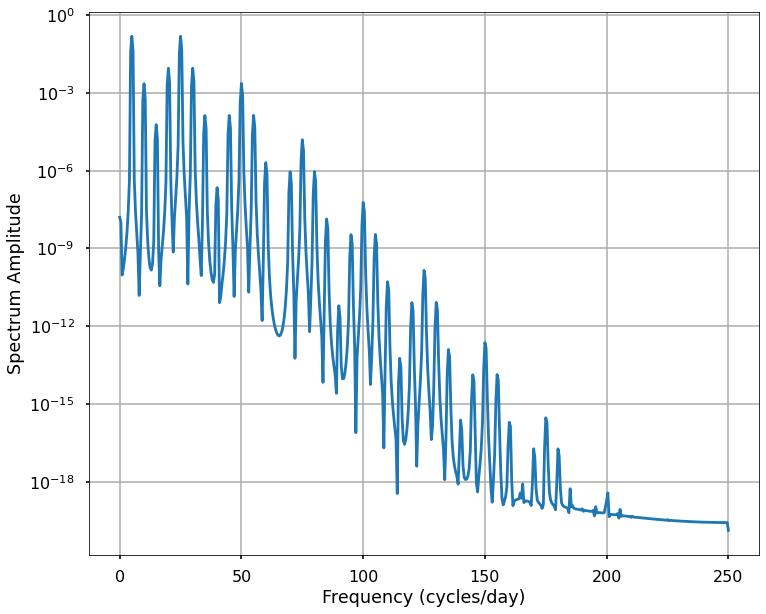

In [510]:
plt.figure(figsize = (12, 10))
plt.plot(f,Pxx)
plt.yscale('log')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Spectrum Amplitude')
plt.grid()

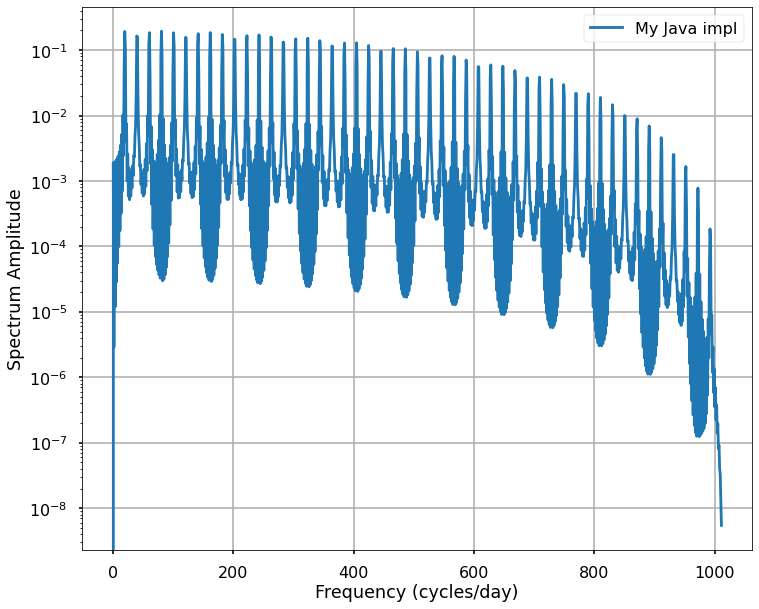

In [511]:
plt.figure(figsize = (12, 10))
#plt.plot(Pxx, label="Periodogram")
plt.plot(pxx[:len(pxx)//2], label="My Java impl")
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Spectrum Amplitude')
plt.yscale('log')
plt.legend()
plt.grid()

#### Thresholds 
* Calculate power threshold as the average maximum signal power for a permutation of the signal (a non-periodic signal)
* Set a minimum periodic value to be 0.1 as very small values are unreliable.

In [512]:
s=[]
for i in range(100):
    perm_i = np.random.permutation(tempNorm)
    f_i, Pxx_i = signal.periodogram(perm_i, fs = fs, window='hanning', scaling='spectrum')
    max_i = np.max(np.abs(Pxx_i))
    s.append(max_i)
s.sort()
threshold = s[-2]

min_period_value = 0.1

In [513]:
all_possible_periods = [1/f[x] for x in np.where(np.abs(Pxx)>threshold)][0]
all_possible_periods

array([0.22222222, 0.2       , 0.18181818, 0.04081633, 0.04      ,
       0.03921569])

In [514]:
possible_periods = all_possible_periods[all_possible_periods>=min_period_value]
possible_periods = possible_periods[possible_periods<len(tempNorm)]
possible_periods

array([0.22222222, 0.2       , 0.18181818])

## Autocorrelation

In [515]:
# get the autocorrelation coefficient
acf = sm.tsa.acf(tempNorm, nlags=len(tempNorm), fft=True)

In [516]:
def find_closest_peak(func, index):
    # go right
    while (func[index] < func[index+1]):
        index += 1
    #go left
    while (func[index] < func[index-1]):
        index -= 1
    return index/fs

In [518]:
acceleration=np.diff(np.diff(acf))
periods=[]
for hint in possible_periods:
    index = math.floor(hint*fs)
    if (index < len(acceleration) and acceleration[math.floor(hint*fs)] <= 0):
        periods.append(find_closest_peak(acf, math.floor(hint*fs)))
periods = np.unique(periods)
periods

array([0.2  , 0.238])

In [530]:
acceleration[80:100]

array([-0.04557407, -0.03838999, -0.02713335, -0.01338804,  0.00109846,
        0.01473473,  0.0262889 ,  0.03494832,  0.04026298,  0.04203245,
        0.04020027,  0.03480591,  0.02601918,  0.01424772,  0.00026954,
       -0.01468567, -0.02898163, -0.04078329, -0.04839792, -0.05065476])

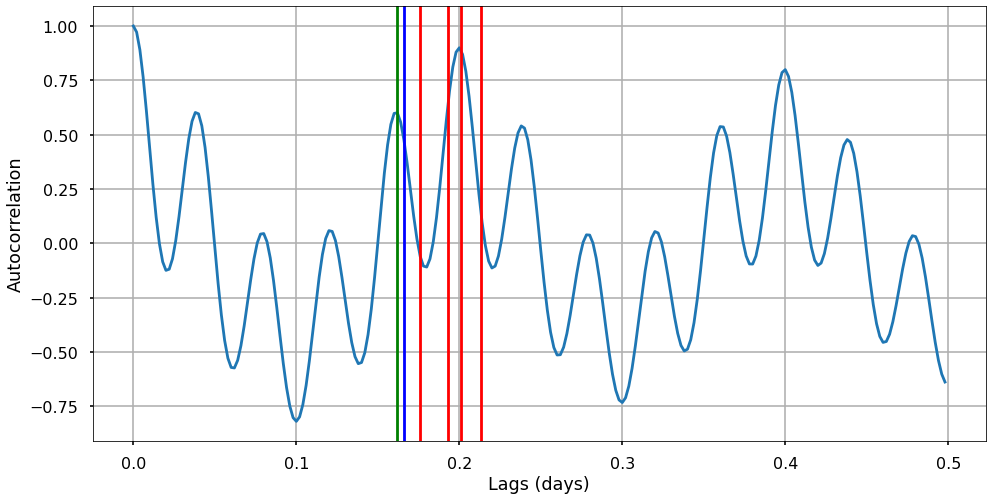

In [535]:
plt.figure(figsize = (16, 8))
lag = np.arange(len(tempNorm)) / fs
plt.plot(lag[:len(lag)//4], acf[:len(lag)//4])
for hint in [0.213, 0.201       , 0.1928, 0.17608]:
    index = math.floor(hint*fs)
    plt.axvline(x=hint, color='red')
plt.axvline(x=0.162, color='green')

plt.axvline(x=lag[83], color='blue')
plt.xlabel('Lags (days)')
plt.ylabel('Autocorrelation')
plt.grid()

In [454]:
myarray=[1.0,0.49079591836734693,-0.018408163265306123,-0.018428571428571423,-0.018448979591836723,-0.018469387755102096,-0.01848979591836733,-0.01851020408163266,-0.01853061224489796,-0.018551020408163258,-0.01857142857142856,-0.018591836734693893,-0.018612244897959193,-0.018632653061224504,-0.018653061224489786,-0.018673469387755107,-0.01869387755102041,-0.01871428571428572,-0.018734693877551025,-0.018755102040816325,-0.01877551020408165,-0.01879591836734693,-0.018816326530612253,-0.018836734693877557,-0.018857142857142843,-0.018877551020408168,-0.01889795918367345,-0.018918367346938747,-0.018938775510204068,-0.018959183673469385,-0.018979591836734724,-0.019000000000000003,-0.019020408163265293,-0.01904081632653061,-0.01906122448979592,-0.019081632653061224,-0.019102040816326528,-0.01912244897959183,-0.019142857142857145,-0.01916326530612243,-0.01918367346938773,-0.019204081632653056,-0.01922448979591837,-0.019244897959183677,-0.019265306122448977,-0.019285714285714305,-0.0193061224489796,-0.019326530612244906,-0.01934693877551021,-0.019367346938775502,-0.01938775510204081,-0.01940816326530611,-0.01942857142857143,-0.019448979591836744,-0.01946938775510205,-0.019489795918367348,-0.01951020408163268,-0.019530612244897966,-0.01955102040816327,-0.019571428571428556,-0.019591836734693863,-0.019612244897959173,-0.019632653061224487,-0.01965306122448979,-0.019673469387755098,-0.019693877551020398,-0.019714285714285726,-0.019734693877551016,-0.019755102040816316,-0.01977551020408163,-0.019795918367346933,-0.019816326530612247,-0.019836734693877544,-0.01985714285714283,-0.01987755102040814,-0.019897959183673472,-0.01991836734693878,-0.01993877551020409,-0.019959183673469397,-0.019979591836734693,-0.020000000000000004,-0.020020408163265307,-0.020040816326530615,-0.02006122448979593,-0.020081632653061215,-0.020102040816326557,-0.020122448979591853,-0.020142857142857153,-0.02016326530612246,-0.020183673469387774,-0.020204081632653057,-0.020224489795918364,-0.020244897959183678,-0.02026530612244899,-0.0202857142857143,-0.020306122448979613,-0.020326530612244872,-0.020346938775510196,-0.02036734693877551,0.43981632653061226,0.9,0.4418163265306123,-0.016367346938775517,-0.01638775510204081,-0.01640816326530613,-0.016428571428571435,-0.016448979591836752,-0.01646938775510205,-0.01648979591836735,-0.01651020408163264,-0.016530612244897925,-0.016551020408163253,-0.01657142857142858,-0.016591836734693884,-0.016612244897959177,-0.01663265306122447,-0.016653061224489802,-0.016673469387755106,-0.01669387755102041,-0.01671428571428572,-0.016734693877551013,-0.016755102040816313,-0.01677551020408164,-0.016795918367346948,-0.016816326530612248,-0.01683673469387755,-0.01685714285714285,-0.01687755102040814,-0.016897959183673456,-0.01691836734693879,-0.016938775510204077,-0.016959183673469384,-0.01697959183673468,-0.01699999999999999,-0.017020408163265298,-0.017040816326530598,-0.01706122448979591,-0.01708163265306122,-0.017102040816326537,-0.017122448979591833,-0.017142857142857112,-0.017163265306122437,-0.01718367346938775,-0.01720408163265306,-0.017224489795918355,-0.017244897959183676,-0.017265306122448976,-0.017285714285714297,-0.017306122448979597,-0.01732653061224489,-0.017346938775510187,-0.017367346938775508,-0.017387755102040818,-0.017408163265306132,-0.017428571428571443,-0.01744897959183675,-0.017469387755102046,-0.017489795918367357,-0.017510204081632657,-0.017530612244897957,-0.01755102040816325,-0.017571428571428578,-0.017591836734693875,-0.017612244897959175,-0.017632653061224454,-0.017653061224489768,-0.017673469387755106,-0.01769387755102041,-0.01771428571428571,-0.017734693877551028,-0.017755102040816314,-0.017775510204081652,-0.017795918367346942,-0.017816326530612218,-0.01783673469387753,-0.017857142857142842,-0.01787755102040817,-0.017897959183673477,-0.017918367346938788,-0.017938775510204088,-0.017959183673469402,-0.017979591836734685,-0.018000000000000002,-0.018020408163265316,-0.018040816326530616,-0.018061224489795937,-0.018081632653061237,-0.018102040816326544,-0.01812244897959185,-0.018142857142857165,-0.018163265306122427,-0.018183673469387752,-0.018204081632653062,-0.01822448979591838,-0.01824489795918369,-0.018265306122449025,-0.018285714285714273,-0.01830612244897958,-0.018326530612244898,0.39083673469387753,0.7999999999999999,0.3928367346938775,-0.014326530612244901,-0.014346938775510196,-0.014367346938775496,-0.014387755102040777,-0.014408163265306117,-0.014428571428571436,-0.014448979591836731,-0.014469387755102014,-0.014489795918367313,-0.014510204081632658,-0.014530612244897963,-0.014551020408163274,-0.014571428571428563,-0.01459183673469386,-0.014612244897959176,-0.014632653061224495,-0.0146530612244898,-0.014673469387755086,-0.014693877551020387,-0.014714285714285706,-0.01473469387755103,-0.014755102040816332,-0.014775510204081637,-0.014795918367346924,-0.01481632653061222,-0.014836734693877522,-0.014857142857142845,-0.014877551020408155,-0.014897959183673457,-0.014918367346938776,-0.014938775510204063,-0.01495918367346938,-0.014979591836734692,-0.015000000000000006,-0.015020408163265312,-0.015040816326530615,-0.01506122448979593,-0.015081632653061217,-0.015102040816326512,-0.015122448979591823,-0.01514285714285714,-0.01516326530612245,-0.015183673469387723,-0.0152040816326531,-0.015224489795918362,-0.01524489795918368,-0.015265306122448979,-0.01528571428571427,-0.015306122448979595,-0.015326530612244897,-0.015346938775510202,-0.015367346938775514,-0.01538775510204083,-0.01540816326530613,-0.01542857142857144,-0.015448979591836744,-0.015469387755102046,-0.015489795918367343,-0.015510204081632643,-0.015530612244897959,-0.01555102040816326,-0.015571428571428557,-0.015591836734693873,-0.015612244897959206,-0.0156326530612245,-0.015653061224489798,-0.015673469387755098,-0.015693877551020443,-0.015714285714285754,-0.015734693877551036,-0.015755102040816326,-0.01577551020408161,-0.015795918367346926,-0.015816326530612237,-0.015836734693877565,-0.015857142857142868,-0.015877551020408175,-0.015897959183673472,-0.01591836734693878,-0.015938775510204083,-0.015959183673469393,-0.015979591836734704,-0.015999999999999997,-0.0160204081632653,-0.016040816326530618,-0.016061224489795932,-0.016081632653061242,-0.01610204081632653,-0.016122448979591808,-0.01614285714285714,-0.01616326530612245,-0.01618367346938776,-0.016204081632653064,-0.0162244897959184,-0.01624489795918364,-0.016265306122448968,-0.01628571428571428,0.34185714285714286,0.7,0.34385714285714286,-0.012285714285714294,-0.012306122448979594,-0.012326530612244906,-0.012346938775510234,-0.012367346938775527,-0.012387755102040824,-0.012408163265306126,-0.012428571428571419,-0.012448979591836723,-0.012469387755102033,-0.01248979591836735,-0.01251020408163266,-0.012530612244897963,-0.01255102040816325,-0.012571428571428575,-0.012591836734693879,-0.012612244897959188,-0.012632653061224495,-0.012653061224489783,-0.012673469387755085,-0.012693877551020413,-0.012714285714285716,-0.012734693877550997,-0.01275510204081632,-0.012775510204081603,-0.012795918367346915,-0.012816326530612229,-0.01283673469387754,-0.012857142857142902,-0.012877551020408171,-0.012897959183673448,-0.012918367346938773,-0.012938775510204083,-0.012959183673469368,-0.012979591836734698,-0.013000000000000008,-0.013020408163265317,-0.013040816326530619,-0.0130612244897959,-0.013081632653061209,-0.01310204081632653,-0.013122448979591837,-0.013142857142857156,-0.01316326530612247,-0.013183673469387775,-0.013204081632653065,-0.01322448979591837,-0.013244897959183656,-0.013265306122448976,-0.013285714285714269,-0.013306122448979591,-0.013326530612244905,-0.013346938775510225,-0.013367346938775518,-0.013387755102040839,-0.013408163265306135,-0.013428571428571432,-0.013448979591836736,-0.013469387755102029,-0.013489795918367352,-0.013510204081632641,-0.013530612244897938,-0.013551020408163257,-0.01357142857142855,-0.013591836734693882,-0.013612244897959183,-0.01363265306122449,-0.013653061224489798,-0.013673469387755112,-0.013693877551020426,-0.013714285714285715,-0.013734693877550996,-0.013755102040816316,-0.013775510204081642,-0.013795918367346952,-0.01381632653061225,-0.013836734693877565,-0.013857142857142877,-0.01387755102040813,-0.013897959183673463,-0.01391836734693878,-0.01393877551020409,-0.013959183673469384,-0.013979591836734695,-0.014000000000000012,-0.014020408163265321,-0.014040816326530632,-0.014061224489795925,-0.014081632653061215,-0.014102040816326515,-0.014122448979591834,-0.01414285714285715,-0.014163265306122443,-0.014183673469387764,-0.014204081632653043,-0.014224489795918354,-0.014244897959183668,0.2928775510204082,0.6000000000000001,0.2948775510204081,-0.010244897959183687,-0.01026530612244898,-0.010285714285714271,-0.010306122448979597,-0.010326530612244936,-0.010346938775510212,-0.010367346938775515,-0.010387755102040794,-0.010408163265306043,-0.010428571428571403,-0.010448979591836736,-0.010469387755102047,-0.010489795918367342,-0.010510204081632618,-0.01053061224489795,-0.010551020408163272,-0.010571428571428577,-0.010591836734693865,-0.010612244897959195,-0.010632653061224484,-0.010653061224489795,-0.010673469387755105,-0.0106938775510204,-0.010714285714285702,-0.010734693877550999,-0.0107551020408163,-0.010775510204081613,-0.01079591836734693,-0.010816326530612229,-0.01083673469387755,-0.01085714285714284,-0.010877551020408154,-0.010897959183673455,-0.010918367346938775,-0.010938775510204087,-0.010959183673469397,-0.010979591836734711,-0.010999999999999996,-0.011020408163265251,-0.011040816326530596,-0.011061224489795914,-0.011081632653061222,-0.011102040816326542,-0.011122448979591863,-0.011142857142857164,-0.011163265306122458,-0.011183673469387758,-0.011204081632653053,-0.011224489795918368,-0.011244897959183672,-0.011265306122448977,-0.011285714285714291,-0.011306122448979591,-0.011326530612244914,-0.011346938775510207,-0.01136734693877552,-0.011387755102040821,-0.011408163265306144,-0.011428571428571413,-0.011448979591836736,-0.011469387755102029,-0.011489795918367329,-0.011510204081632636,-0.011530612244897955,-0.011551020408163266,-0.011571428571428571,-0.01159183673469388,-0.011612244897959203,-0.011632653061224506,-0.011653061224489803,-0.011673469387755108,-0.01169387755102039,-0.011714285714285693,-0.011734693877551015,-0.011755102040816326,-0.01177551020408164,-0.01179591836734695,-0.011816326530612252,-0.011836734693877565,-0.011857142857142858,-0.011877551020408168,-0.011897959183673484,-0.011918367346938779,-0.011938775510204088,-0.011959183673469386,-0.01197959183673471,-0.012000000000000016,-0.012020408163265318,-0.012040816326530573,-0.0120612244897959,-0.01208163265306122,-0.012102040816326536,-0.012122448979591843,-0.01214285714285716,-0.012163265306122419,-0.012183673469387741,-0.012204081632653057,0.24389795918367355,0.5,0.2458979591836735,-0.008204081632653076,-0.008224489795918373,-0.00824489795918367,-0.008265306122448891,-0.008285714285714302,-0.008306122448979606,-0.0083265306122449,-0.008346938775510205,-0.00836734693877552,-0.008387755102040791,-0.008408163265306119,-0.008428571428571431,-0.008448979591836735,-0.008469387755102045,-0.008489795918367356,-0.00851020408163266,-0.008530612244897965,-0.008551020408163253,-0.008571428571428555,-0.008591836734693872,-0.008612244897959184,-0.008632653061224495,-0.008653061224489784,-0.0086734693877551,-0.008693877551020386,-0.00871428571428569,-0.008734693877551011,-0.008755102040816332,-0.008775510204081651,-0.008795918367346927,-0.008816326530612225,-0.008836734693877543,-0.008857142857142855,-0.008877551020408164,-0.008897959183673471,-0.008918367346938792,-0.008938775510204097,-0.008959183673469408,-0.008979591836734654,-0.008999999999999977,-0.009020408163265306,-0.00904081632653061,-0.009061224489795924,-0.009081632653061276,-0.009102040816326552,-0.00912244897959184,-0.009142857142857144,-0.00916326530612243,-0.009183673469387756,-0.009204081632653058,-0.009224489795918363,-0.009244897959183682,-0.009265306122449,-0.0092857142857143,-0.009306122448979605,-0.009326530612244907,-0.009346938775510209,-0.00936734693877553,-0.009387755102040802,-0.009408163265306128,-0.009428571428571416,-0.009448979591836713,-0.009469387755102011,-0.00948979591836732,-0.009510204081632646,-0.009530612244897966,-0.009551020408163267,-0.009571428571428599,-0.009591836734693902,-0.009612244897959197,-0.009632653061224499,-0.009653061224489778,-0.009673469387755072,-0.009693877551020386,-0.009714285714285707,-0.009734693877551027,-0.009755102040816338,-0.00977551020408166,-0.009795918367346945,-0.00981632653061225,-0.009836734693877561,-0.00985714285714287,-0.009877551020408175,-0.00989795918367346,-0.009918367346938791,-0.009938775510204098,-0.009959183673469402,-0.00997959183673469,-0.009999999999999993,-0.01002040816326529,-0.010040816326530602,-0.010061224489795921,-0.010081632653061215,-0.010102040816326542,-0.010122448979591815,-0.010142857142857132,-0.010163265306122445,0.19491836734693876,0.39999999999999997,0.19691836734693877,-0.006163265306122464,-0.006183673469387764,-0.006204081632653069,-0.006224489795918378,-0.006244897959183651,-0.006265306122448989,-0.006285714285714286,-0.006306122448979615,-0.006326530612244954,-0.0063469387755101785,-0.006367346938775504,-0.006387755102040812,-0.006408163265306139,-0.006428571428571363,-0.006448979591836731,-0.006469387755102044,-0.006489795918367352,-0.006510204081632647,-0.006530612244897947,-0.006551020408163256,-0.006571428571428575,-0.0065918367346938815,-0.006612244897959194,-0.006632653061224485,-0.006653061224489782,-0.006673469387755088,-0.006693877551020394,-0.006714285714285704,-0.006734693877551022,-0.006755102040816315,-0.00677551020408161,-0.006795918367346932,-0.006816326530612237,-0.006836734693877517,-0.006857142857142866,-0.0068775510204081795,-0.006897959183673493,-0.006918367346938769,-0.006938775510204051,-0.006959183673469364,-0.006979591836734697,-0.006999999999999999,-0.007020408163265314,-0.007040816326530633,-0.007061224489795922,-0.007081632653061227,-0.007102040816326533,-0.0071224489795918226,-0.007142857142857136,-0.0071632653061224315,-0.007183673469387751,-0.00720408163265307,-0.00722448979591838,-0.0072448979591837066,-0.00726530612244899,-0.007285714285714297,-0.007306122448979598,-0.0073265306122449044,-0.007346938775510209,-0.007367346938775511,-0.007387755102040804,-0.007408163265306103,-0.007428571428571419,-0.007448979591836742,-0.007469387755102049,-0.007489795918367348,-0.007510204081632656,-0.007530612244897974,-0.007551020408163258,-0.007571428571428575,-0.007591836734693892,-0.007612244897959162,-0.007632653061224463,-0.007653061224489774,-0.0076734693877551045,-0.007693877551020414,-0.007714285714285726,-0.007734693877551029,-0.007755102040816381,-0.007775510204081637,-0.007795918367346945,-0.007816326530612264,-0.007836734693877554,-0.00785714285714285,-0.007877551020408163,-0.007897959183673491,-0.007918367346938793,-0.007938775510204093,-0.007959183673469386,-0.00797959183673469,-0.007999999999999986,-0.008020408163265305,-0.008040816326530606,-0.008061224489795913,-0.008081632653061206,-0.008102040816326522,-0.008122448979591832,0.1459387755102041,0.3,0.14793877551020404,-0.0041224489795918615,-0.004142857142857153,-0.0041632653061224375,-0.004183673469387753,-0.004204081632653063,-0.004224489795918377,-0.004244897959183675,-0.004265306122449002,-0.0042857142857142495,-0.004306122448979589,-0.0043265306122448905,-0.004346938775510197,-0.004367346938775509,-0.004387755102040785,-0.004408163265306124,-0.004428571428571437,-0.004448979591836742,-0.004469387755102018,-0.004489795918367357,-0.004510204081632638,-0.004530612244897961,-0.004551020408163269,-0.00457142857142858,-0.004591836734693849,-0.004612244897959153,-0.004632653061224472,-0.004653061224489781,-0.004673469387755095,-0.004693877551020435,-0.004714285714285686,-0.0047346938775510005,-0.004755102040816311,-0.004775510204081596,-0.004795918367346884,-0.004816326530612252,-0.004836734693877564,-0.004857142857142876,-0.004877551020408179,-0.004897959183673447,-0.00491836734693877,-0.004938775510204088,-0.004959183673469387,-0.004979591836734697,-0.005000000000000054,-0.005020408163265324,-0.00504081632653062,-0.00506122448979592,-0.005081632653061209,-0.00510204081632651,-0.005122448979591825,-0.005142857142857138,-0.005163265306122458,-0.005183673469387757,-0.0052040816326530785,-0.00522448979591838,-0.005244897959183682,-0.005265306122448981,-0.005285714285714308,-0.005306122448979592,-0.005326530612244888,-0.00534693877551019,-0.0053673469387754864,-0.0053877551020408065,-0.005408163265306112,-0.005428571428571434,-0.005448979591836736,-0.005469387755102042,-0.005489795918367355,-0.005510204081632646,-0.005530612244897967,-0.005551020408163276,-0.005571428571428556,-0.005591836734693855,-0.005612244897959181,-0.005632653061224481,-0.005653061224489802,-0.005673469387755111,-0.00569387755102043,-0.005714285714285724,-0.005734693877551027,-0.005755102040816331,-0.0057755102040816485,-0.00579591836734695,-0.005816326530612238,-0.005836734693877557,-0.00585714285714288,-0.005877551020408184,-0.005897959183673487,-0.005918367346938765,-0.005938775510204075,-0.005959183673469383,-0.005979591836734691,-0.005999999999999981,-0.006020408163265318,-0.006040816326530591,-0.006061224489795913,-0.006081632653061221,0.09695918367346941,0.2,0.09895918367346937,-0.002081632653061245,-0.0021020408163265384,-0.002122448979591833,-0.0021428571428571594,-0.002163265306122454,-0.0021836734693877675,-0.0022040816326530607,-0.00222448979591839,-0.00224489795918366,-0.0022653061224489415,-0.002285714285714276,-0.002306122448979585,-0.002326530612244925,-0.002346938775510264,-0.0023673469387755003,-0.0023877551020408234,-0.0024081632653061317,-0.0024285714285714258,-0.002448979591836742,-0.002469387755102035,-0.0024897959183673496,-0.0025102040816326627,-0.002530612244897967,-0.0025510204081632564,-0.002571428571428547,-0.0025918367346938597,-0.00261224489795917,-0.002632653061224476,-0.002653061224489813,-0.0026734693877551014,-0.0026938775510203885,-0.0027142857142857025,-0.0027346938775510044,-0.002755102040816326,-0.002775510204081639,-0.002795918367346956,-0.002816326530612264,-0.0028367346938775614,-0.0028571428571428498,-0.002877551020408157,-0.002897959183673475,-0.0029183673469387753,-0.0029387755102040815,-0.002959183673469405,-0.002979591836734704,-0.003000000000000004,-0.0030204081632653063,-0.003040816326530603,-0.003061224489795893,-0.0030816326530612127,-0.0031020408163265232,-0.00312244897959184,-0.0031428571428571616,-0.003163265306122453,-0.003183673469387768,-0.003204081632653069,-0.003224489795918368,-0.003244897959183693,-0.003265306122448962,-0.0032857142857142777,-0.0033061224489795717,-0.0033265306122448736,-0.003346938775510192,-0.003367346938775511,-0.003387755102040812,-0.0034081632653061213,-0.003428571428571432,-0.0034489795918367437,-0.003469387755102037,-0.0034897959183673617,-0.0035102040816326623,-0.00353061224489794,-0.003551020408163243,-0.003571428571428546,-0.0035918367346938706,-0.003612244897959187,-0.0036326530612244955,-0.003653061224489818,-0.0036734693877551352,-0.003693877551020412,-0.0037142857142857216,-0.0037346938775510343,-0.0037551020408163444,-0.0037755102040816333,-0.0037959183673469386,-0.0038163265306122665,-0.003836734693877576,-0.0038571428571428715,-0.0038775510204081313,-0.003897959183673463,-0.0039183673469387675,-0.003938775510204074,-0.00395918367346938,-0.003979591836734704,-0.00399999999999998,-0.0040204081632652985,-0.004040816326530603,0.047979591836734725,0.10000000000000002,0.04997959183673468,-4.081632653063027E-5,-6.122448979592285E-5,-8.1632653061219E-5,-1.0204081632653521E-4,-1.2244897959183995E-4,-1.4285714285715295E-4,-1.6326530612245017E-4,-1.8367346938775601E-4,-2.040816326531338E-4,-2.2448979591836873E-4,-2.448979591836635E-4,-2.6530612244897396E-4,-2.857142857142894E-4,-3.0612244897960564E-4,-3.2653061224489894E-4,-3.469387755102062E-4,-3.673469387755217E-4,-3.877551020408247E-4,-4.0816326530609503E-4,-4.2857142857141126E-4,-4.489795918367432E-4,-4.693877551020537E-4,-4.897959183673455E-4,-5.102040816326316E-4,-5.306122448979479E-4,-5.510204081632548E-4,-5.714285714285566E-4,-5.918367346938578E-4,-6.12244897959222E-4,-6.326530612244909E-4,-6.530612244897871E-4,-6.734693877550926E-4,-6.938775510203873E-4,-7.14285714285677E-4,-7.346938775510255E-4,-7.551020408163467E-4,-7.755102040816572E-4,-7.959183673469254E-4,-8.163265306122159E-4,-8.367346938775529E-4,-8.571428571428676E-4,-8.775510204081645E-4,-8.979591836734778E-4,-9.183673469388119E-4,-9.38775510204101E-4,-9.591836734693942E-4,-9.79591836734696E-4,-9.99999999999996E-4,-0.001020408163265292,-0.001040816326530591,-0.0010612244897959075,-0.0010816326530612313,-0.0011020408163265544,-0.001122448979591835,-0.0011428571428571616,-0.0011632653061224543,-0.001183673469387758,-0.0012040816326530626,-0.0012244897959183573,-0.0012448979591836787,-0.001265306122448959,-0.0012857142857142614,-0.0013061224489795819,-0.0013265306122448818,-0.0013469387755102081,-0.0013673469387755122,-0.0013877551020408177,-0.0014081632653061352,-0.0014285714285714236,-0.001448979591836749,-0.0014693877551020546,-0.0014897959183673341,-0.001510204081632648,-0.0015306122448979541,-0.001551020408163257,-0.0015714285714285747,-0.001591836734693883,-0.001612244897959186,-0.0016326530612245068,-0.0016530612244898052,-0.001673469387755108,-0.0016938775510204175,-0.0017142857142856951,-0.0017346938775509779,-0.0017551020408163344,-0.0017755102040816562,-0.0017959183673469578,-0.0018163265306122569,-0.0018367346938775414,-0.0018571428571428517,-0.0018775510204081527,-0.0018979591836734582,-0.0019183673469387633,-0.0019387755102040752,-0.0019591836734693694,-0.001979591836734684,-0.00199999999999999,-9.999999999999857E-4,]


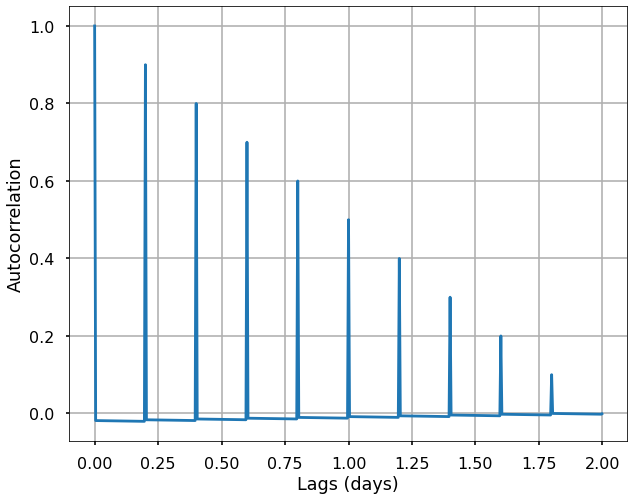

In [455]:
plt.figure(figsize = (10, 8))
lag = np.arange(len(tempNorm)) / fs
plt.plot(lag, myarray)
plt.xlabel('Lags (days)')
plt.ylabel('Autocorrelation')
plt.grid()

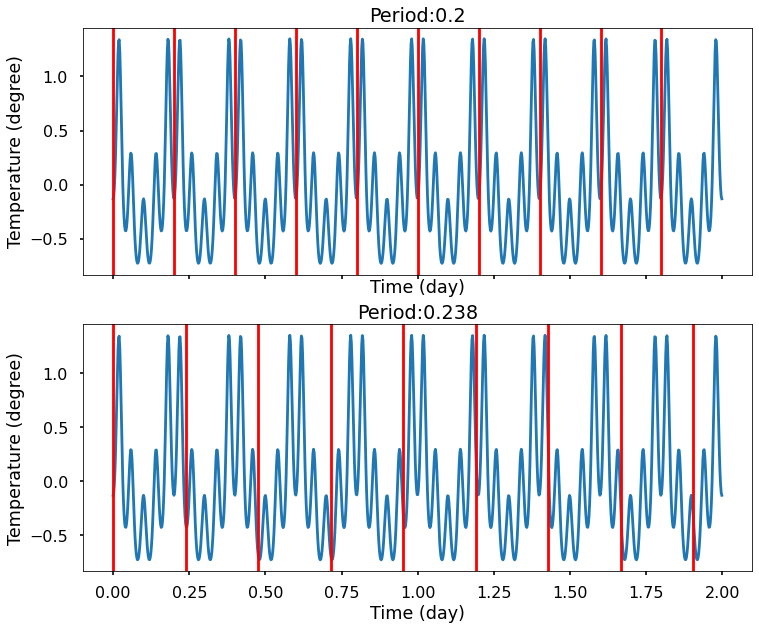

In [523]:
# let's plot the data
fig, axs = plt.subplots(len(periods), sharex=True, sharey=True, figsize = (12, 10), squeeze=False)

for idx in range(len(periods)):
    p = periods[idx]
    axs[idx,0].plot(t, tempNorm)
    axs[idx,0].set_title('Period:{p}'.format(p=p))
    for i in np.arange(starttime, endtime, p):
        axs[idx,0].axvline(x=i, color='red')
        
for ax in axs.flat:
    ax.set(xlabel='Time (day)', ylabel='Temperature (degree)')

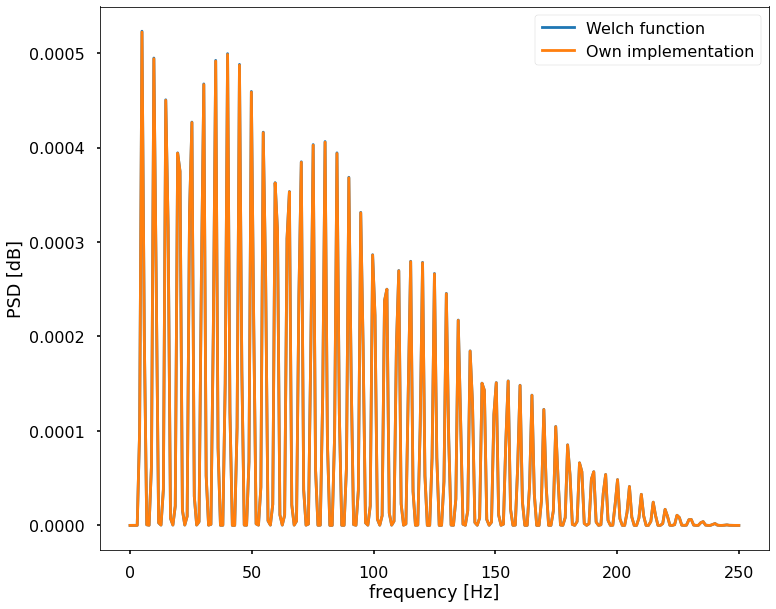

In [457]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)

# Generate a test signal (a 2 Vrms) sine wave at 1000 Hz and a second one a 1500 Hz, corrupted by 
# 0.001 V**2/Hz of white noise sampled at 7.5 kHz

#fs = 7.5e3
#N = 500
#amp = 2*np.sqrt(2)
#freq=1000
#noise_power = 0.001 * fs /2
#time = np.arange(N) / fs
#data = amp* np.sin(2*np.pi*freq*time) + 0.7*amp* np.sin(2*np.pi*1.5*freq*time)
#data += np.random.normal(scale=np.sqrt(noise_power),size=time.shape)
freq = 2
amp = 1
starttime = 0
endtime = 2
N=1000
fs = 500
data = signal2

# Welch estimate parameters
segment_size = np.int32(0.5*N) # Segment size = 50 % of data length
overlap_fac = 0.5
overlap_size = overlap_fac*segment_size
fft_size = 512
detrend = True # If true, removes signal mean
scale_by_freq = True

# Frequency resolution
fres = fs/segment_size

## Welch function
f_welch, PSD_welch = signal.welch(tempNorm, fs,window='hann', nperseg=segment_size, noverlap=overlap_size, nfft=fft_size, return_onesided=True, detrend='constant', average='mean')
f, Pxx = signal.periodogram(tempNorm, fs = fs, window='hanning', scaling='spectrum')

## Own implementation
# PSD size = N/2 + 1 
PSD_size = np.int32(fft_size/2)+1


# Number of segments
baseSegment_number = np.int32(len(data)/segment_size) # Number of initial segments
total_segments =  np.int32(baseSegment_number + ((1-overlap_fac)**(-1) - 1 ) * (baseSegment_number - 1)) # No. segments including overlap
window = signal.hann(segment_size) # Hann window

if scale_by_freq:
    # Scale the spectrum by the norm of the window to compensate for
    # windowing loss; see Bendat & Piersol Sec 11.5.2.
    S2 = np.sum((window)**2) 
else:
    # In this case, preserve power in the segment, not amplitude
    S2 = (np.sum(window))**2

fft_segment = np.empty((total_segments,fft_size),dtype=np.complex64)
for i in range(total_segments):
    offset_segment = np.int32(i* (1-overlap_fac)*segment_size)
    current_segment = data[offset_segment:offset_segment+segment_size]
    # Detrend (Remove mean value)   
    if detrend :
        current_segment = current_segment - np.mean(current_segment)
    windowed_segment = np.multiply(current_segment,window)
    fft_segment[i] = np.square(np.abs(np.fft.fft(windowed_segment,fft_size))) # fft automatically pads if n<nfft


# Add FFTs of different segments
fft_sum = np.zeros(fft_size,dtype=np.complex64)
for segment in fft_segment:
     fft_sum += segment

# Signal manipulation factors      

# Normalization including window effect on power
powerDensity_normalization = 1/S2
# Averaging decreases FFT variance
powerDensity_averaging = 1/total_segments
# Transformation from Hz.s to Hz spectrum
if scale_by_freq:
    powerDensity_transformation = 1/fs
else:
    powerDensity_transformation = 1

# Make oneSided estimate 1st -> N+1st element
fft_WelchEstimate_oneSided = fft_sum[0:PSD_size]

# Convert FFT values to power density in U**2/Hz
PSD_own = abs(fft_WelchEstimate_oneSided) * powerDensity_averaging * powerDensity_normalization * powerDensity_transformation
# Double frequencies except DC and Nyquist
PSD_own[2:PSD_size-1] *= 2
fft_freq = np.fft.fftfreq(fft_size,1/fs)
freq = fft_freq[0:PSD_size]
# Take absolute value of Nyquist frequency (negative using np.fft.fftfreq)
freq[-1] = np.abs(freq[-1])

PSD_welch_dB = 10 * np.log10(PSD_welch) # Scale to dB
PSD_own_dB = 10 * np.log10(PSD_own) # Scale to dB


plt.figure(figsize = (12, 10))
plt.plot(f_welch, PSD_welch.real,label='Welch function')
#plt.plot(f, Pxx,label='Periodogram')
plt.plot(freq,PSD_own.real,label='Own implementation')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB]')
plt.legend()

In [349]:
tempNorm.shape

(1000,)